<a href="https://colab.research.google.com/github/Letrus/Seattle-Urban-Heat-Island-Project/blob/main/SimpleEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the uploaded Excel file
file_path = "/content/egrid2023_data_rev2.xlsx"

# Read the PLNT23 sheet
plants_df = pd.read_excel(file_path, sheet_name="PLNT23")

# Show top rows so we can confirm column names
plants_df.head()

,Plant file sequence number,Data Year,Plant state abbreviation,Plant name,DOE/EIA ORIS plant or facility code,Plant transmission or distribution system owner name,Plant transmission or distribution system owner ID,Utility name,Utility ID,Plant-level sector,...,Plant geothermal generation percent (resource mix),Plant other fossil generation percent (resource mix),Plant other unknown / purchased fuel generation percent (resource mix),Plant total nonrenewables generation percent (resource mix),Plant total renewables generation percent (resource mix),Plant total nonrenewables other unknown/purchased generation percent (resource mix),Plant total nonhydro renewables generation percent (resource mix),Plant total combustion generation percent (resource mix),Plant total noncombustion generation percent (resource mix),Plant total noncombustion other unknown/purchased generation percent (resource mix)
0,SEQPLT23,YEAR,PSTATABB,PNAME,ORISPL,OPRNAME,OPRCODE,UTLSRVNM,UTLSRVID,SECTOR,...,PLGTPR,PLOFPR,PLOPPR,PLTNPR,PLTRPR,PLTOPR,PLTHPR,PLCYPR,PLCNPR,PLCOPR
1,1,2023,AK,Alakanuk,57053,"Alaska Village Elec Coop, Inc",221,"Alaska Village Elec Coop, Inc",221,Electric Utility,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2023,AK,Allison Creek Hydro,58982,"Copper Valley Elec Assn, Inc",4329,"Copper Valley Elec Assn, Inc",4329,Electric Utility,...,0,0,0,0,1,0,0,0,1,0
3,3,2023,AK,Ambler,60243,"Alaska Village Elec Coop, Inc",221,"Alaska Village Elec Coop, Inc",221,Electric Utility,...,0,0,0,1,0,0,0,1,0,0
4,4,2023,AK,Angoon,7462,"Inside Passage Elec Coop, Inc",18963,"Inside Passage Elec Coop, Inc",18963,Electric Utility,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
plants_wa = plants_df[plants_df["Plant state abbreviation"] == "WA"].copy()
plants_wa.shape


(142, 150)

In [ ]:
#keeps only plants with lat and long
plants_wa = plants_wa.dropna(subset=["Plant latitude", "Plant longitude"])


In [ ]:
plants_wa

,Plant file sequence number,Data Year,Plant state abbreviation,Plant name,DOE/EIA ORIS plant or facility code,Plant transmission or distribution system owner name,Plant transmission or distribution system owner ID,Utility name,Utility ID,Plant-level sector,...,Plant geothermal generation percent (resource mix),Plant other fossil generation percent (resource mix),Plant other unknown / purchased fuel generation percent (resource mix),Plant total nonrenewables generation percent (resource mix),Plant total renewables generation percent (resource mix),Plant total nonrenewables other unknown/purchased generation percent (resource mix),Plant total nonhydro renewables generation percent (resource mix),Plant total combustion generation percent (resource mix),Plant total noncombustion generation percent (resource mix),Plant total noncombustion other unknown/purchased generation percent (resource mix)
12131,12131,2023,WA,Adams Nielson Solar,61933,Avista Corp,20169,"Strata Manager, LLC",64778,IPP Non-CHP,...,0,0,0,0,1,0,1,0,1,0
12132,12132,2023,WA,Alder,3913,City of Tacoma - (WA),18429,City of Tacoma - (WA),18429,Electric Utility,...,0,0,0,0,1,0,0,0,1,0
12133,12133,2023,WA,Arlington Microgrid,64446,PUD 1 of Snohomish County,17470,PUD No 1 of Snohomish County,17470,Electric Utility,...,0,0,0,0,1,0,1,0,1,0
12134,12134,2023,WA,Big Horn Wind II,57319,Bonneville Power Administration,1738,Avangrid Renewables LLC,15399,IPP Non-CHP,...,0,0,0,0,1,0,1,0,1,0
12135,12135,2023,WA,Big Horn Wind Project,56361,Bonneville Power Administration,1738,Avangrid Renewables LLC,15399,IPP Non-CHP,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12268,12268,2023,WA,Windy Flats Wind Project,57159,PUD No 1 of Klickitat County,10393,Windy Flats Partners LLC,56514,IPP Non-CHP,...,0,0,0,0,1,0,1,0,1,0
12269,12269,2023,WA,Wynoochee,7127,City of Tacoma - (WA),18429,City of Tacoma - (WA),18429,Electric Utility,...,0,0,0,0,1,0,0,0,1,0
12270,12270,2023,WA,Yale,3852,PacifiCorp,14354,PacifiCorp,14354,Electric Utility,...,0,0,0,0,1,0,0,0,1,0
12271,12271,2023,WA,Yelm,3878,City of Centralia - (WA),3295,City of Centralia - (WA),3295,Electric Utility,...,0,0,0,0,1,0,0,0,1,0


In [ ]:

# Show all column names to search for correct labels
for c in plants_df.columns:
    print(c)


Plant file sequence number
Data Year
Plant state abbreviation
Plant name
DOE/EIA ORIS plant or facility code
Plant transmission or distribution system owner name
Plant transmission or distribution system owner ID
Utility name
Utility ID
Plant-level sector
Balancing Authority Name
Balancing Authority Code
NERC region acronym
eGRID subregion acronym
eGRID subregion name
Plant associated ISO/RTO Territory
Plant FIPS state code
Plant FIPS county code
Plant county name
Plant latitude
Plant longitude
CAPD Program Flag
Number of units
Number of generators
Plant primary fuel
Plant primary fuel category
Flag indicating if the plant burned or generated any amount of coal
Plant capacity factor
Plant nameplate capacity (MW)
Nonbaseload Factor
Biogas/ biomass plant adjustment flag
Combined heat and power (CHP) plant adjustment flag
CHP plant useful thermal output (MMBtu)
CHP plant power to heat ratio
CHP plant electric allocation factor
Plant pumped storage flag
Plant annual heat input from combust

In [ ]:
# Select only WA plants
plants_wa = plants_df[plants_df["Plant state abbreviation"] == "WA"].copy()

# Keep only plants that have coordinates (some facilities do not)
plants_wa = plants_wa.dropna(subset=["Plant latitude", "Plant longitude"])

# Select only variables we need
cols = [
    "Plant name",
    "Plant county name",
    "Plant latitude",
    "Plant longitude",
    "Plant annual CO2 emissions (tons)",
    "Plant annual NOx emissions (tons)",
    "Plant annual SO2 emissions (tons)",
    "Plant annual net generation (MWh)",
    "Plant primary fuel"
]

plants_clean = plants_wa[cols].copy()
plants_clean.head()


,Plant name,Plant county name,Plant latitude,Plant longitude,Plant annual CO2 emissions (tons),Plant annual NOx emissions (tons),Plant annual SO2 emissions (tons),Plant annual net generation (MWh),Plant primary fuel
12131,Adams Nielson Solar,Adams,46.95528,-118.621244,NaN,NaN,NaN,37050,SUN
12132,Alder,Pierce,46.8016,-122.3102,NaN,NaN,NaN,169437,WAT
12133,Arlington Microgrid,Snohomish,48.15614,-122.1502,NaN,NaN,NaN,697,SUN
12134,Big Horn Wind II,Klickitat,45.9192,-120.3039,NaN,NaN,NaN,98976,WND
12135,Big Horn Wind Project,Klickitat,45.8877,-120.2896,NaN,NaN,NaN,435223,WND


In [ ]:
seattle_metro = plants_clean[
    plants_clean["Plant county name"].str.contains("KING|PIERCE|SNOHOMISH", case=False, na=False)
].copy()

seattle_metro


,Plant name,Plant county name,Plant latitude,Plant longitude,Plant annual CO2 emissions (tons),Plant annual NOx emissions (tons),Plant annual SO2 emissions (tons),Plant annual net generation (MWh),Plant primary fuel
12132,Alder,Pierce,46.8016,-122.3102,NaN,NaN,NaN,169437,WAT
12133,Arlington Microgrid,Snohomish,48.15614,-122.1502,NaN,NaN,NaN,697,SUN
12137,Black Creek,King,47.549652,-121.710517,NaN,NaN,NaN,8641,WAT
12141,Calligan Creek Hydroelectric Project,King,47.6008,-121.68861,NaN,NaN,NaN,9398,WAT
12143,Cedar Falls (WA),King,47.4193,-121.781858,NaN,NaN,NaN,25204,WAT
12144,Cedar Hills,King,47.455833,-122.042778,548.138,0,1.4,453.996,LFG
12155,Crystal Mountain,Pierce,46.953468,-121.475198,10.29,0.205,0.018,10,DFO
12158,Darrington,Snohomish,48.269737,-121.599979,0,7.418,1.113,15975,WDS
12162,Electron,Pierce,46.990967,-122.174921,NaN,NaN,NaN,0,WAT
12167,Frederickson,Pierce,47.079722,-122.365,135566.644,371.132,3.707,159586.996,NG


In [ ]:
df = seattle_metro.copy()

heat_fuels = ["NG", "DFO", "LFG", "OBG", "BLQ", "WDS"]  # WDS optional

heat_plants = df[df["Plant primary fuel"].isin(heat_fuels)].copy()

heat_plants


,Plant name,Plant county name,Plant latitude,Plant longitude,Plant annual CO2 emissions (tons),Plant annual NOx emissions (tons),Plant annual SO2 emissions (tons),Plant annual net generation (MWh),Plant primary fuel
12144,Cedar Hills,King,47.455833,-122.042778,548.138,0,1.4,453.996,LFG
12155,Crystal Mountain,Pierce,46.953468,-121.475198,10.29,0.205,0.018,10,DFO
12158,Darrington,Snohomish,48.269737,-121.599979,0,7.418,1.113,15975,WDS
12167,Frederickson,Pierce,47.079722,-122.365,135566.644,371.132,3.707,159586.996,NG
12168,Frederickson Power LP,Pierce,47.086111,-122.365674,780419.922,68.847,3.968,1824053,NG
12187,LRI LFGTE Facility,Pierce,46.975556,-122.290556,0,0,6.258,33605.001,LFG
12254,University of Washington Power Plant,King,47.6539,-122.3036,2005.092,2.678,0.013,1302.812,NG
12263,West Point Treatment Plant,King,47.661111,-122.446389,0,93.901,0.138,7214,OBG
12264,WestRock (WA),Pierce,47.266069,-122.428288,4756.263,123.584,198.826,179307.22,BLQ


In [ ]:
heat_plants.to_csv("/content/seattle_heat_plants.csv", index=False)



In [ ]:
# ==== USER OPTIONS ====
# Path to your filtered, heat-emitting plant table you saved earlier:
PLANTS_CSV = "/content/seattle_heat_plants.csv"   # change if needed

# Choose LST source:
#   "earth_engine" -> pulls MODIS LST via Google Earth Engine (recommended)
#   "files"        -> if you already have LST_Day.tif & LST_Night.tif in /content
LST_SOURCE = "earth_engine"  # "earth_engine" or "files"

# If LST_SOURCE == "files", set these:
LST_DAY_PATH = "/content/LST_Day.tif"
LST_NIGHT_PATH = "/content/LST_Night.tif"


In [ ]:
!pip install geopandas rasterio shapely contextily pandas numpy matplotlib geemap --quiet

import geopandas as gpd
import pandas as pd
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from shapely.geometry import Point


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.5 MB/s eta 0:00:00


In [ ]:
plants = pd.read_csv(PLANTS_CSV)

# Keep only columns we need and ensure numeric types
keep_cols = [
    "Plant name", "Plant county name", "Plant latitude", "Plant longitude",
    "Plant annual CO2 emissions (tons)",
    "Plant annual NOx emissions (tons)",
    "Plant annual SO2 emissions (tons)",
    "Plant annual net generation (MWh)",
    "Plant primary fuel"
]
plants = plants[keep_cols].copy()

# Basic sanity check
plants.head(), plants.shape


(              Plant name Plant county name  Plant latitude  Plant longitude  \
 0            Cedar Hills              King       47.455833      -122.042778   
 1       Crystal Mountain            Pierce       46.953468      -121.475198   
 2             Darrington         Snohomish       48.269737      -121.599979   
 3           Frederickson            Pierce       47.079722      -122.365000   
 4  Frederickson Power LP            Pierce       47.086111      -122.365674   
 
    Plant annual CO2 emissions (tons)  Plant annual NOx emissions (tons)  \
 0                            548.138                              0.000   
 1                             10.290                              0.205   
 2                              0.000                              7.418   
 3                         135566.644                            371.132   
 4                         780419.922                             68.847   
 
    Plant annual SO2 emissions (tons)  Plant annual net gene

In [ ]:
!pip install rasterio geopandas shapely --quiet

import numpy as np, rasterio
from rasterio.transform import from_origin
from rasterio.crs import CRS

# Seattle region bounding box (rough)
west, south, east, north = -122.55, 47.45, -122.20, 47.75
width, height = 300, 300
xres = (east - west) / width
yres = (north - south) / height
transform = from_origin(west, north, xres, yres)
crs = CRS.from_epsg(4326)

# Smooth synthetic LST fields (°C)
x = np.linspace(0, 1, width)
y = np.linspace(0, 1, height)
xx, yy = np.meshgrid(x, y)

day   = 18 + 6*xx + 2*yy
night = 12 + 4*xx + 1.3*yy

def add_hotspot(A, r, c, amp=2.5, sig=15):
    rr, cc = np.indices(A.shape)
    A += amp * np.exp(-((rr-r)**2 + (cc-c)**2)/(2*sig**2))

add_hotspot(day,   100, 120, 2.5)
add_hotspot(day,   200, 200, 1.9)
add_hotspot(night, 100, 120, 3.3)
add_hotspot(night, 200, 200, 2.4)

for arr, path in [(day, "/content/LST_Day.tif"), (night, "/content/LST_Night.tif")]:
    with rasterio.open(
        path, "w", driver="GTiff", height=arr.shape[0], width=arr.shape[1],
        count=1, dtype="float32", crs=crs, transform=transform
    ) as dst:
        dst.write(arr.astype("float32"), 1)

print("✅ Created: LST_Day.tif and LST_Night.tif")


✅ Created: LST_Day.tif and LST_Night.tif


In [ ]:
!pip install geopandas pyproj --quiet

import geopandas as gpd
import pandas as pd
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from shapely.geometry import Point
from pyproj import Transformer

# Paths for LST rasters
LST_DAY_PATH   = "/content/LST_Day.tif"
LST_NIGHT_PATH = "/content/LST_Night.tif"

# Load rasters
day_src   = rasterio.open(LST_DAY_PATH)
night_src = rasterio.open(LST_NIGHT_PATH)
day_arr   = day_src.read(1).astype(float)
night_arr = night_src.read(1).astype(float)

day_arr[~np.isfinite(day_arr)]     = np.nan
night_arr[~np.isfinite(night_arr)] = np.nan

print("Day/Night shapes:", day_arr.shape, night_arr.shape)


Day/Night shapes: (300, 300) (300, 300)


In [ ]:
# Expecting your filtered table to be in a DataFrame named `heat_plants`.
# It should include columns: Plant name, Plant latitude, Plant longitude, emissions, net generation, Plant primary fuel.

assert 'heat_plants' in globals(), "heat_plants DataFrame not found. Make sure you've created it."
display(heat_plants.head())

# Make a GeoDataFrame (assumes lat/lon in WGS84)
plants_gdf = gpd.GeoDataFrame(
    heat_plants.copy(),
    geometry=gpd.points_from_xy(heat_plants["Plant longitude"], heat_plants["Plant latitude"]),
    crs="EPSG:4326"
)
print(plants_gdf.crs)


,Plant name,Plant county name,Plant latitude,Plant longitude,Plant annual CO2 emissions (tons),Plant annual NOx emissions (tons),Plant annual SO2 emissions (tons),Plant annual net generation (MWh),Plant primary fuel
12144,Cedar Hills,King,47.455833,-122.042778,548.138,0,1.4,453.996,LFG
12155,Crystal Mountain,Pierce,46.953468,-121.475198,10.29,0.205,0.018,10,DFO
12158,Darrington,Snohomish,48.269737,-121.599979,0,7.418,1.113,15975,WDS
12167,Frederickson,Pierce,47.079722,-122.365,135566.644,371.132,3.707,159586.996,NG
12168,Frederickson Power LP,Pierce,47.086111,-122.365674,780419.922,68.847,3.968,1824053,NG


EPSG:4326


/tmp/ipython-input-975283345.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([day_arr.flatten(), night_arr.flatten()], labels=['Day LST (°C)', 'Night LST (°C)'])


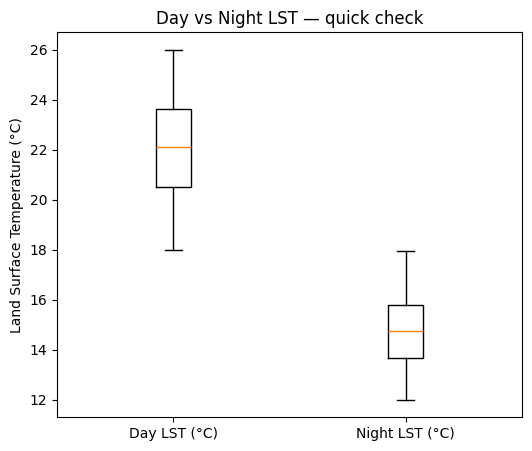

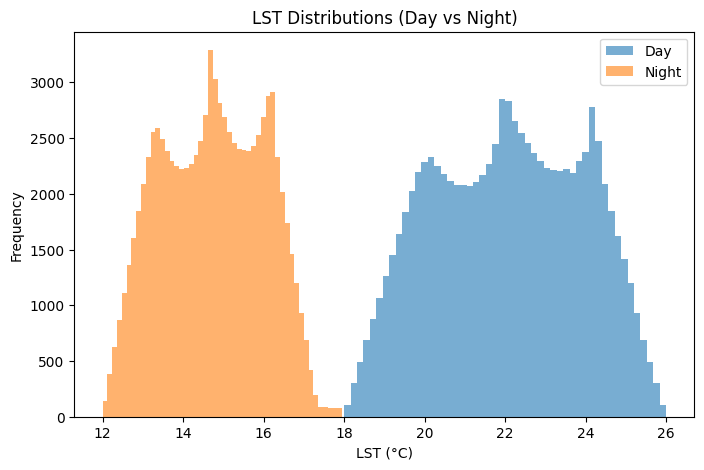

In [ ]:
# Boxplot Day vs Night
plt.figure(figsize=(6,5))
plt.boxplot([day_arr.flatten(), night_arr.flatten()], labels=['Day LST (°C)', 'Night LST (°C)'])
plt.ylabel("Land Surface Temperature (°C)")
plt.title("Day vs Night LST — quick check")
plt.show()

# Histograms of Day vs Night
plt.figure(figsize=(8,5))
plt.hist(day_arr[np.isfinite(day_arr)].flatten(), bins=50, alpha=0.6, label="Day")
plt.hist(night_arr[np.isfinite(night_arr)].flatten(), bins=50, alpha=0.6, label="Night")
plt.xlabel("LST (°C)")
plt.ylabel("Frequency")
plt.title("LST Distributions (Day vs Night)")
plt.legend()
plt.show()


Detected columns: Plant annual CO2 emissions (tons) Plant annual NOx emissions (tons) Plant annual SO2 emissions (tons) Plant annual net generation (MWh)


/tmp/ipython-input-1064030632.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  em_df = heat_plants[["Plant name"] + em_cols].fillna(0).set_index("Plant name")


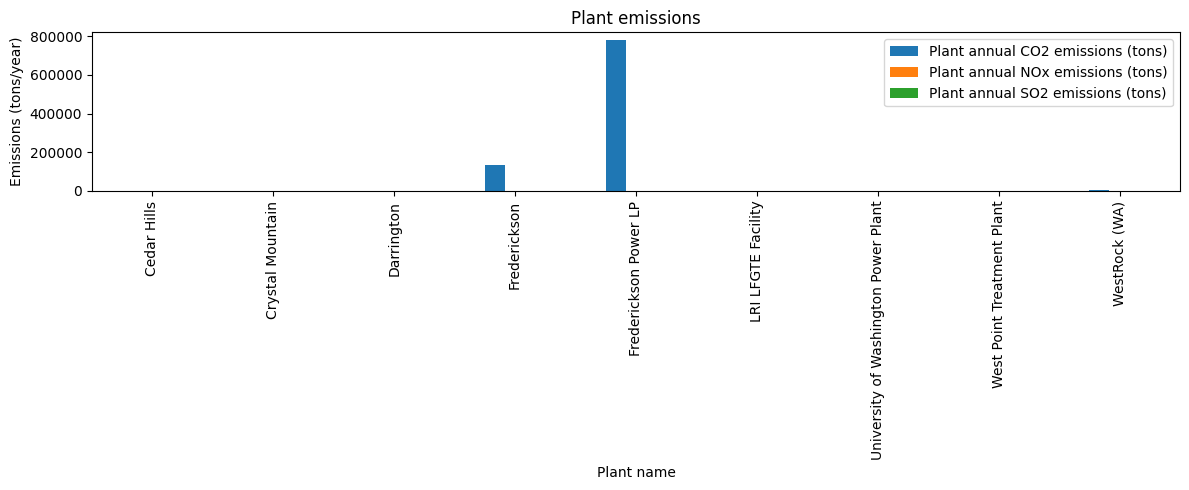

In [ ]:
# Try to auto-detect emissions & generation columns by name fragments
def find_col(df, fragments):
    fc = fragments if isinstance(fragments, (list, tuple)) else [fragments]
    cand = [c for c in df.columns if all(f.lower() in c.lower() for f in fc)]
    return cand[0] if cand else None

co2_col  = find_col(heat_plants, ["co2", "emissions"])
nox_col  = find_col(heat_plants, ["nox", "emissions"])
so2_col  = find_col(heat_plants, ["so2", "emissions"])
gen_col  = find_col(heat_plants, ["net", "generation"])

print("Detected columns:", co2_col, nox_col, so2_col, gen_col)

# Build a small emissions table if columns exist
em_cols = []
if co2_col: em_cols.append(co2_col)
if nox_col: em_cols.append(nox_col)
if so2_col: em_cols.append(so2_col)

if em_cols:
    em_df = heat_plants[["Plant name"] + em_cols].fillna(0).set_index("Plant name")
    ax = em_df.plot(kind="bar", figsize=(12,5))
    ax.set_ylabel("Emissions (tons/year)")
    ax.set_title("Plant emissions")
    plt.tight_layout()
    plt.show()
else:
    print("No emissions columns found — skipping bar chart.")


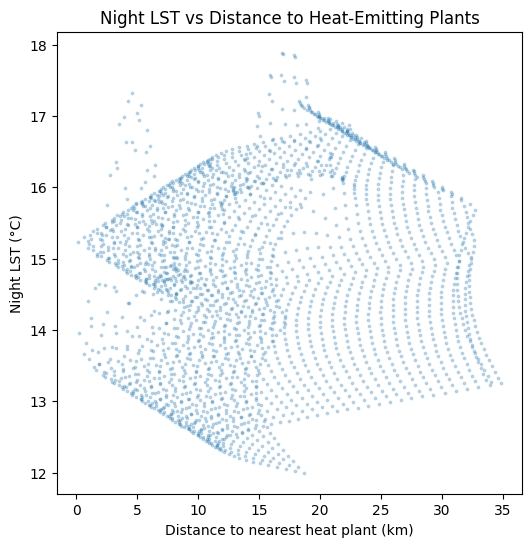

In [ ]:
from scipy.spatial import cKDTree

# Get raster transform
transform = night_src.transform

# Compute coordinate grid (lon/lat) correctly
rows, cols = np.indices(night_arr.shape)
lon_grid = transform.c + cols * transform.a + rows * transform.b
lat_grid = transform.f + cols * transform.d + rows * transform.e

# Subsample pixels for speed
step = 6
lon_s = lon_grid[::step, ::step].ravel()
lat_s = lat_grid[::step, ::step].ravel()
night_vals = night_arr[::step, ::step].ravel()

# Mask NaNs
mask = np.isfinite(night_vals)
lon_s, lat_s, night_vals = lon_s[mask], lat_s[mask], night_vals[mask]

# Project coordinates to meters (so distance makes sense)
from pyproj import Transformer
to3857 = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)
px_x, px_y = to3857.transform(lon_s, lat_s)
pl_x, pl_y = to3857.transform(plants_gdf.geometry.x.values, plants_gdf.geometry.y.values)

# Nearest-plant distance via KDTree
tree = cKDTree(np.column_stack((pl_x, pl_y)))
dist_m, _ = tree.query(np.column_stack((px_x, px_y)), k=1)

# Convert meters → km
dist_km = dist_m / 1000.0

# Scatter plot
plt.figure(figsize=(6,6))
plt.scatter(dist_km, night_vals, s=3, alpha=0.25)
plt.xlabel("Distance to nearest heat plant (km)")
plt.ylabel("Night LST (°C)")
plt.title("Night LST vs Distance to Heat-Emitting Plants")
plt.show()


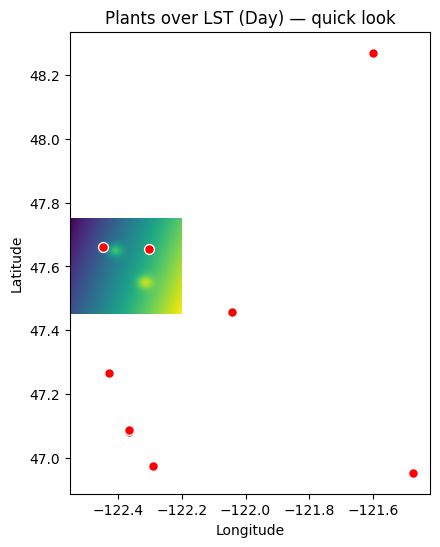

In [ ]:
# Plot raster outline + plant points (no basemap to keep deps light)
bounds = day_src.bounds
extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]

plt.figure(figsize=(7,6))
plt.imshow(day_arr, extent=extent, origin='upper')
plt.scatter(heat_plants["Plant longitude"], heat_plants["Plant latitude"], s=50, c='red', edgecolors='white')
plt.title("Plants over LST (Day) — quick look")
plt.xlabel("Longitude"); plt.ylabel("Latitude")
plt.show()


In [ ]:
rank_cols = ["Plant name", "Plant primary fuel"]
for c in [gen_col, co2_col, nox_col, so2_col]:
    if c and c not in rank_cols:
        rank_cols.append(c)

rank_df = heat_plants[rank_cols].copy()
if gen_col:
    rank_df = rank_df.sort_values(gen_col, ascending=False)

display(rank_df.head(15))

# Save for later, if you want
rank_df.to_csv("/content/seattle_heat_plants_ranked.csv", index=False)
print("Saved: /content/seattle_heat_plants_ranked.csv")


,Plant name,Plant primary fuel,Plant annual net generation (MWh),Plant annual CO2 emissions (tons),Plant annual NOx emissions (tons),Plant annual SO2 emissions (tons)
12168,Frederickson Power LP,NG,1824053,780419.922,68.847,3.968
12264,WestRock (WA),BLQ,179307.22,4756.263,123.584,198.826
12167,Frederickson,NG,159586.996,135566.644,371.132,3.707
12187,LRI LFGTE Facility,LFG,33605.001,0,0,6.258
12158,Darrington,WDS,15975,0,7.418,1.113
12263,West Point Treatment Plant,OBG,7214,0,93.901,0.138
12254,University of Washington Power Plant,NG,1302.812,2005.092,2.678,0.013
12144,Cedar Hills,LFG,453.996,548.138,0,1.4
12155,Crystal Mountain,DFO,10,10.29,0.205,0.018


Saved: /content/seattle_heat_plants_ranked.csv


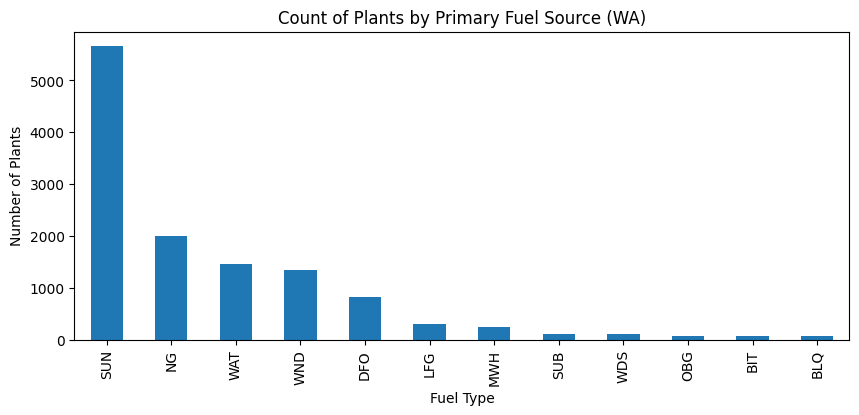

In [32]:
plt.figure(figsize=(10,4))
plants_df["Plant primary fuel"].value_counts().head(12).plot(kind='bar')
plt.title("Count of Plants by Primary Fuel Source (WA)")
plt.ylabel("Number of Plants")
plt.xlabel("Fuel Type")
plt.show()


Using column: Plant annual net generation (MWh)


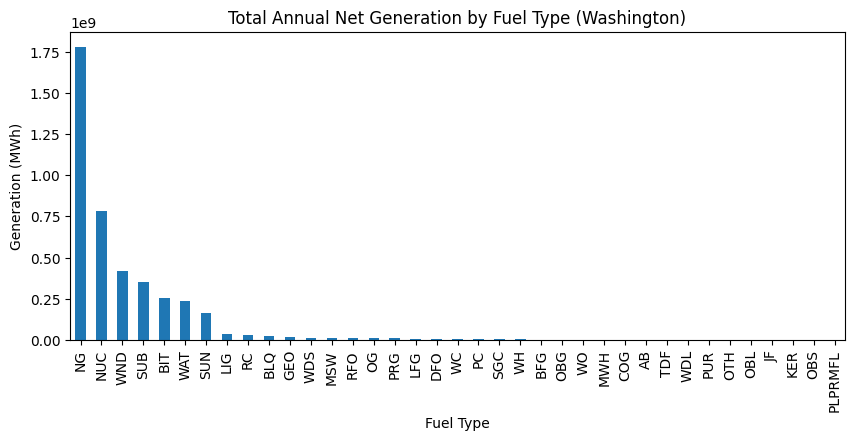

In [35]:
# 1) Identify the generation column
gen_col = [c for c in plants_df.columns if "annual net generation" in c.lower()][0]
print("Using column:", gen_col)

# 2) Convert to numeric (force errors to NaN)
plants_df[gen_col] = pd.to_numeric(plants_df[gen_col], errors="coerce")

# 3) Group and plot
fuel_gen = (
    plants_df.groupby("Plant primary fuel")[gen_col]
    .sum(min_count=1)   # ensures no all-NaN issues
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,4))
fuel_gen.plot(kind='bar')
plt.title("Total Annual Net Generation by Fuel Type (Washington)")
plt.ylabel("Generation (MWh)")
plt.xlabel("Fuel Type")
plt.show()


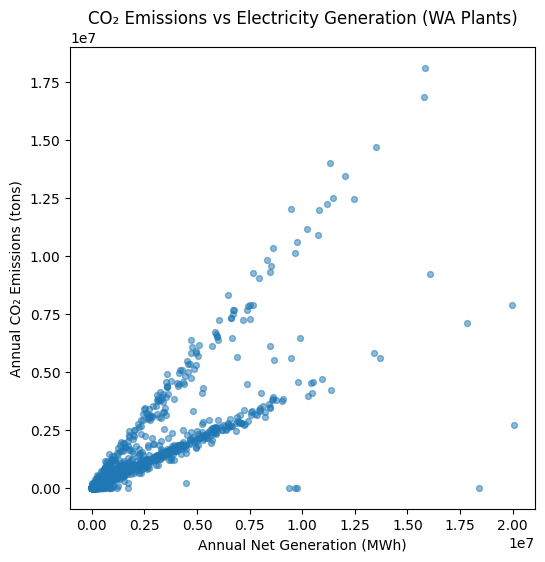

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Find columns (or replace with your known names)
gen_col = [c for c in plants_df.columns if "annual net generation" in c.lower()][0]
co2_col = [c for c in plants_df.columns if "co2" in c.lower() and "annual" in c.lower()][0]

# Coerce to numeric
plants_df[gen_col] = pd.to_numeric(plants_df[gen_col], errors="coerce")
plants_df[co2_col] = pd.to_numeric(plants_df[co2_col], errors="coerce")

# Keep finite values only
tmp = plants_df[[gen_col, co2_col]].replace([np.inf, -np.inf], np.nan).dropna()

x = tmp[gen_col].to_numpy(dtype=float)
y = tmp[co2_col].to_numpy(dtype=float)

plt.figure(figsize=(6,6))
plt.scatter(x, y, s=18, alpha=0.5)
plt.xlabel("Annual Net Generation (MWh)")
plt.ylabel("Annual CO₂ Emissions (tons)")
plt.title("CO₂ Emissions vs Electricity Generation (WA Plants)")
plt.show()


<Figure size 1200x400 with 0 Axes>

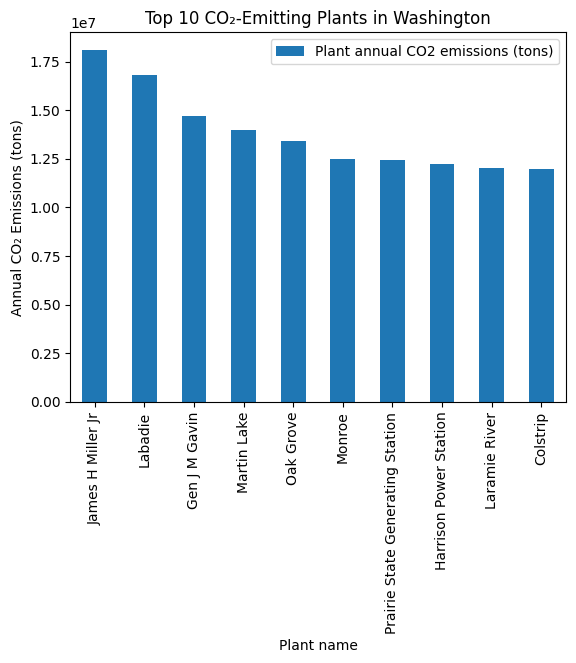

In [38]:
co2_col = [c for c in plants_df.columns if "co2 emissions" in c.lower()][0]

top_co2 = plants_df.nlargest(10, co2_col)[["Plant name", co2_col]].set_index("Plant name")

plt.figure(figsize=(12,4))
top_co2.plot(kind='bar')
plt.title("Top 10 CO₂-Emitting Plants in Washington")
plt.ylabel("Annual CO₂ Emissions (tons)")
plt.show()


In [41]:
wa = plants_df[plants_df["Plant state abbreviation"] == "WA"].copy()

# And convert coords again if needed (safe to re-run)
lat_col = [c for c in wa.columns if "latitude" in c.lower()][0]
lon_col = [c for c in wa.columns if "longitude" in c.lower()][0]

wa[lat_col] = pd.to_numeric(wa[lat_col], errors="coerce")
wa[lon_col] = pd.to_numeric(wa[lon_col], errors="coerce")

wa = wa.dropna(subset=[lat_col, lon_col])


Latitude column: Plant latitude
Longitude column: Plant longitude


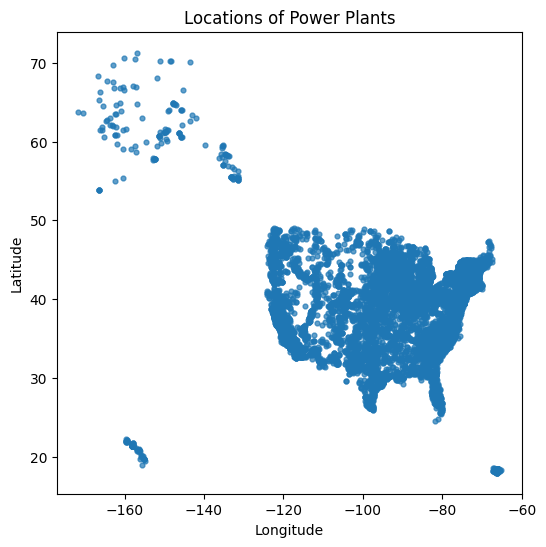

In [43]:
# Identify column names (adjust only if yours differ)
lat_col = [c for c in plants_df.columns if "latitude" in c.lower()][0]
lon_col = [c for c in plants_df.columns if "longitude" in c.lower()][0]

print("Latitude column:", lat_col)
print("Longitude column:", lon_col)

# Convert to numeric (non-numeric values → NaN)
plants_df[lat_col] = pd.to_numeric(plants_df[lat_col], errors="coerce")
plants_df[lon_col] = pd.to_numeric(plants_df[lon_col], errors="coerce")

# Drop rows without coordinates
plants_geo = plants_df.dropna(subset=[lat_col, lon_col])

plt.figure(figsize=(6,6))
plt.scatter(plants_geo[lon_col], plants_geo[lat_col], s=12, alpha=0.7)
plt.title("Locations of Power Plants")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


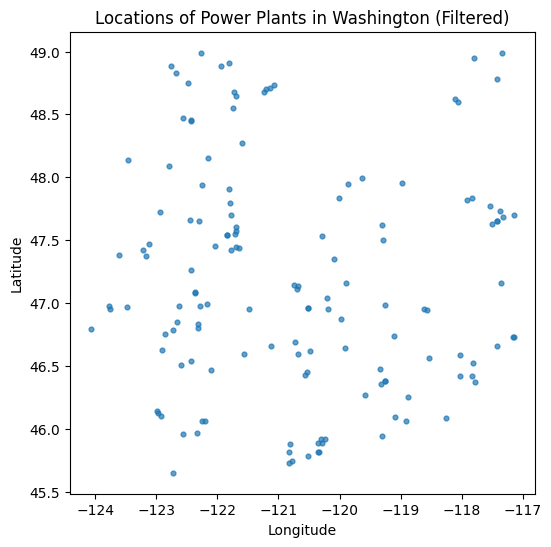

In [42]:
plt.figure(figsize=(6,6))
plt.scatter(wa[lon_col], wa[lat_col], s=12, alpha=0.7)
plt.title("Locations of Power Plants in Washington (Filtered)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
